# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [115]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [116]:
#Units
units = "imperial"
#Url for API call for Celsius units
url= "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("----------------------------")

#Empty lists
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# Initialize count variables for record and set
item = 1
set0 = 1

#for loop 
for city in cities:
    #Query url
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    #Response as json
    data = requests.get(query_url).json()
    #print(data)
    
    #Data into lists using exception
    try:
        print(f"Processing Record {item} of Set {set0} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        #city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        item += 1
        
        #If statement to limit API calls to 50
        if item > 50:
            set0 += 1
            item = 1
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")
        
        

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
        

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | broome
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | kalmunai
Processing Record 10 of Set 1 | mayo
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | coihaique
Processing Record 13 of Set 1 | huntingdon
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kushima
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | sioux lookout
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set

Processing Record 15 of Set 4 | ilulissat
Processing Record 16 of Set 4 | mae ramat
Processing Record 17 of Set 4 | tapaua
City 'tapaua' not found. Skipping...
Processing Record 17 of Set 4 | saskylakh
Processing Record 18 of Set 4 | mahebourg
Processing Record 19 of Set 4 | hithadhoo
Processing Record 20 of Set 4 | japura
Processing Record 21 of Set 4 | ust-ilimsk
Processing Record 22 of Set 4 | bridgetown
Processing Record 23 of Set 4 | chicama
Processing Record 24 of Set 4 | avarua
Processing Record 25 of Set 4 | cabo san lucas
Processing Record 26 of Set 4 | kieta
Processing Record 27 of Set 4 | aksaray
Processing Record 28 of Set 4 | la ronge
Processing Record 29 of Set 4 | bellevue
Processing Record 30 of Set 4 | ouargaye
Processing Record 31 of Set 4 | faanui
Processing Record 32 of Set 4 | purkersdorf
Processing Record 33 of Set 4 | tura
Processing Record 34 of Set 4 | bilibino
Processing Record 35 of Set 4 | fortuna
Processing Record 36 of Set 4 | chuhar kana
Processing Record

Processing Record 44 of Set 7 | nichinan
Processing Record 45 of Set 7 | eregli
Processing Record 46 of Set 7 | simao
Processing Record 47 of Set 7 | atar
Processing Record 48 of Set 7 | touros
Processing Record 49 of Set 7 | tasbuget
City 'tasbuget' not found. Skipping...
Processing Record 49 of Set 7 | tessalit
Processing Record 50 of Set 7 | kudahuvadhoo
Processing Record 1 of Set 8 | tunxi
City 'tunxi' not found. Skipping...
Processing Record 1 of Set 8 | aranos
Processing Record 2 of Set 8 | mehamn
Processing Record 3 of Set 8 | saleaula
City 'saleaula' not found. Skipping...
Processing Record 3 of Set 8 | murgab
Processing Record 4 of Set 8 | hay river
Processing Record 5 of Set 8 | akcaabat
Processing Record 6 of Set 8 | yenagoa
Processing Record 7 of Set 8 | krasnaya gora
Processing Record 8 of Set 8 | beitbridge
Processing Record 9 of Set 8 | kedougou
Processing Record 10 of Set 8 | panguna
Processing Record 11 of Set 8 | sainte-suzanne
Processing Record 12 of Set 8 | dobele
P

Processing Record 8 of Set 11 | yerbogachen
Processing Record 9 of Set 11 | kaniama
Processing Record 10 of Set 11 | kaeo
Processing Record 11 of Set 11 | alice springs
Processing Record 12 of Set 11 | kigoma
Processing Record 13 of Set 11 | watsa
Processing Record 14 of Set 11 | ketchikan
Processing Record 15 of Set 11 | utiroa
City 'utiroa' not found. Skipping...
Processing Record 15 of Set 11 | hamilton
Processing Record 16 of Set 11 | sambava
Processing Record 17 of Set 11 | santa fe
Processing Record 18 of Set 11 | oxford
Processing Record 19 of Set 11 | pingdingshan
Processing Record 20 of Set 11 | impfondo
Processing Record 21 of Set 11 | uthal
Processing Record 22 of Set 11 | westport
Processing Record 23 of Set 11 | tiarei
Processing Record 24 of Set 11 | jinchang
Processing Record 25 of Set 11 | buffalo
Processing Record 26 of Set 11 | halifax
Processing Record 27 of Set 11 | kibala
Processing Record 28 of Set 11 | napasar
Processing Record 29 of Set 11 | najran
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [117]:
#Create Dataframe
cities_df = pd.DataFrame({"City": city_name,
                          "Country": city_country,
                          "Date": date,
                          "Lat": city_lats,
        
                          "Lng": city_lngs,
                          "Max Temp (F)": city_maxtemps,
                          "Humidity (%)": city_humidity,
                          "Cloudiness (%)": city_cloudiness,
                          "Wind Speed (mph)": city_windspeed,
                                })


cities_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)
cities_df.head()

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Lebu,CL,1599265539,-37.62,-73.65,47.07,73,88,4.36
1,New Norfolk,AU,1599265539,-42.78,147.06,55.99,55,41,3.00
2,Bengkulu,ID,1599265540,-3.80,102.27,75.42,89,95,5.30
3,Broome,US,1599265281,42.25,-75.83,66.00,55,1,8.05
4,Cape Town,ZA,1599265318,-33.93,18.42,57.00,93,75,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [118]:
#Cities that have humidity over 100%
humidity_over_100 = cities_df.loc[cities_df["Humidity (%)"] > 100, :]
humidity_over_100

#There are no Cities within humidity over 100%

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


# Conclusion 1
* There are no cities within humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

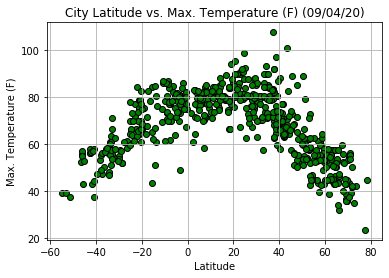

In [122]:
# Convert to floats and store Lat vs Max Temp. as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Max Temp (F)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.grid()
plt.title("City Latitude vs. Max. Temperature (F) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Max. Temperature (F).png")

plt.show()

We can see there is a relation and symmetry between Latitude and Max. Temperature.

## Latitude vs. Humidity Plot

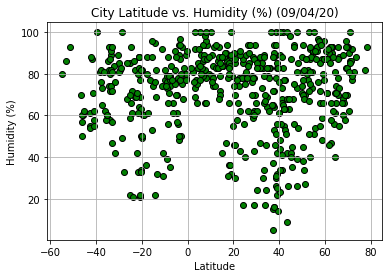

In [123]:
# Convert to floats and store Lat vs Humidity (%) as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Humidity (%)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title("City Latitude vs. Humidity (%) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Humidity (%).png")

plt.show()

We can see there is no relation between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

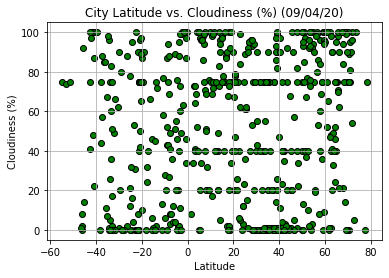

In [124]:
# Convert to floats and store Lat vs Cloudiness (%) as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Cloudiness (%)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title("City Latitude vs. Cloudiness (%) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Cloudiness (%).png")

plt.show()

We can see there is no relation between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

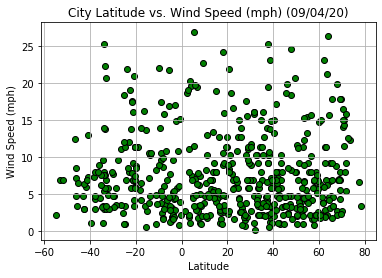

In [126]:
# Convert to floats and store Lat vs Wind Speed (mph) as x and y values
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Wind Speed (mph)'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title("City Latitude vs. Wind Speed (mph) (09/04/20)")

plt.savefig("../Images/City Latitude Vs Wind Speed (mph).png")

plt.show()

We can see there is no relation between Latitude and Wind Speed.

## Linear Regression

In [127]:
# create new df's for northern and southern hempishere
northern_df = cities_df[cities_df['Lat'] > 0]
southern_df = cities_df[cities_df['Lat'] < 0]

# Conclusion 2

* We can see that Northern and Southern Max. Temperature becomes nearly at the 0 Latitude point.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

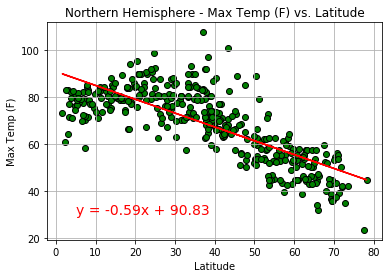

R squared: 0.592391381993456


In [136]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Max Temp (F)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (5, 30), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("../Images/Northern Max Temp Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

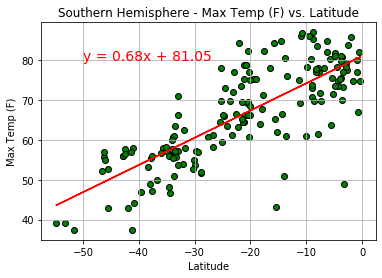

R squared: 0.6116613570781432


In [137]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Max Temp (F)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50,80), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig("../Images/Southern Max Temp Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

# Conclusion 3

* We can see there is NO correlation between Humidity and Latitude on Northern and Southern hemispheres.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

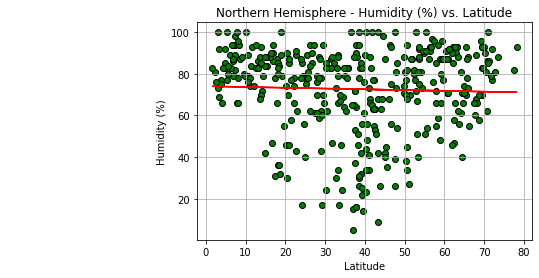

R squared: 0.0012973138123991707


In [138]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Humidity (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50,80), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Northern Humidity (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

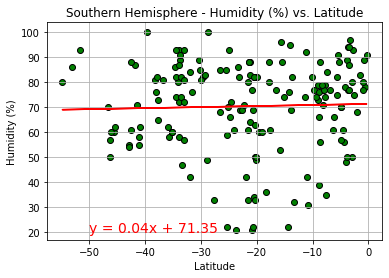

R squared: 0.0010046012679524158


In [139]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Humidity (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-50,20), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Southern Humidity (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

# Conclusion 4

* We can see there is NO correlation between Cloudiness and latitude on Northern and Southern hemispheres.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

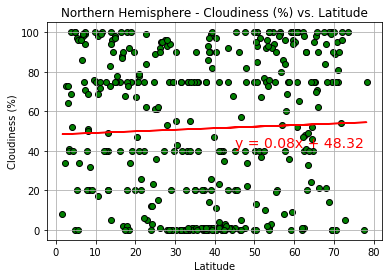

R squared: 0.0016724144511659266


In [140]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Cloudiness (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (45,42), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Northern Cloudiness (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

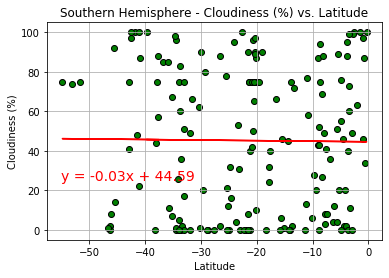

R squared: 0.00011859677316771375


In [141]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Cloudiness (%)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-55,25), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Southern Cloudiness (%) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

# Conclusion 4

* We can see there is NO correlation between Wind Speed and Latitude on Northern and Southern hemispheres but there is a little portion of points that shows us that in the Southern hemisphere there are some wind if we get closer to the Latitude 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

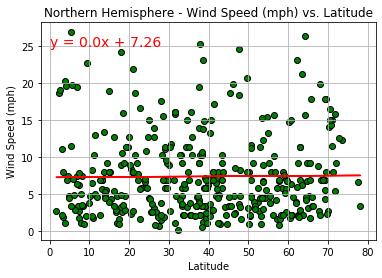

R squared: 0.0001497515561543665


In [142]:
x_value = northern_df['Lat'].astype('float')
y_value = northern_df['Wind Speed (mph)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (0,25), color='red', fontsize= 14)
# Label plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Northern Wind Speed (mph) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

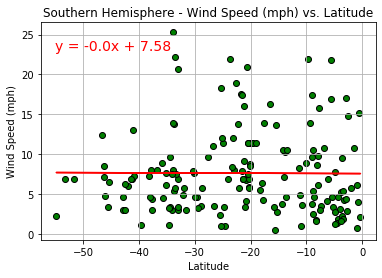

R squared: 3.977205958801992e-05


In [143]:
x_value = southern_df['Lat'].astype('float')
y_value = southern_df['Wind Speed (mph)'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr)= linregress(x_value, y_value)
regress_values= x_value *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_value, y_value, marker="o", facecolors="green", edgecolors="black")
plt.plot(x_value, regress_values, color='red')
plt.annotate(line_eq, (-55,23), color='red', fontsize= 14)
# Label plot
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Southern Wind Speed (mph) Vs Lat.png")
plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")